## Using Deep Learning to Examine the Association of the Built Environment With Prevalence of Neigborhood Mental Health Issues

Importing necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'folium'

### Exploratory Data Analysis

In [25]:
# Load csv file
df = pd.read_csv("500_Cities__Mental_health_not_good_for___14_days_among_adults_aged___18_years.csv")

# Show size
df.shape

(29006, 24)

> Add Commentary

In [26]:
# Dropping unneccessary columns
df = df.drop(["Year","StateDesc", "CityName",
       "DataSource", "Category", "Measure", "Data_Value_Unit",
       "Data_Value_Type", "Data_Value_Footnote_Symbol", "Data_Value_Footnote",
       "CategoryID", "MeasureId", "GeographicLevel",
       "Short_Question_Text"], axis=1)

# This is what we have now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 10 columns):
StateAbbr                29006 non-null object
UniqueID                 29006 non-null object
DataValueTypeID          29006 non-null object
Data_Value               28212 non-null float64
Low_Confidence_Limit     28212 non-null float64
High_Confidence_Limit    28212 non-null float64
PopulationCount          29006 non-null object
GeoLocation              29004 non-null object
CityFIPS                 29004 non-null float64
TractFIPS                28004 non-null float64
dtypes: float64(5), object(5)
memory usage: 2.2+ MB


In [27]:
# Dropping duplicates
df = df.drop_duplicates()

# Finding missing values
n_records = len(df)
def missing_values_df(df):
    for col in df:
        print("{} | {} | {}".format(
            col, len(df[df[col].isnull()]) / (1.0*n_records), df[col].dtype
        ))
missing_values_df(df)

# Dropping missing values (can impute or replace with 0)
orig_size = df.shape[0]
df = df.dropna()
curr_size = df.shape[0]
print("\nDropped {} data points".format(orig_size - curr_size))

StateAbbr | 0.0 | object
UniqueID | 0.0 | object
DataValueTypeID | 0.0 | object
Data_Value | 0.027373646831689996 | float64
Low_Confidence_Limit | 0.027373646831689996 | float64
High_Confidence_Limit | 0.027373646831689996 | float64
PopulationCount | 0.0 | object
GeoLocation | 6.895125146521409e-05 | object
CityFIPS | 6.895125146521409e-05 | float64
TractFIPS | 0.03454457698407226 | float64

Dropped 1796 data points


> Add Commentary

In [28]:
# A quick look at the desciptive statistics of the dataset
df.describe()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS
count,27210.000000,27210.000000,27210.000000,2.721000e+04,2.721000e+04
mean,13.110595,11.836549,14.469688,2.605539e+06,2.586284e+10
std,3.410292,3.166492,3.650666,1.681206e+06,1.671749e+10
min,4.100000,3.100000,5.700000,1.500300e+04,1.073000e+09
25%,10.500000,9.400000,11.700000,6.815540e+05,8.001009e+09
50%,12.700000,11.400000,14.000000,2.622000e+06,2.607700e+10
75%,15.400000,14.000000,16.900000,4.052500e+06,4.010910e+10
max,29.400000,26.600000,32.600000,5.613900e+06,5.602100e+10


> Add Commentary

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d2896d8>,
      dtype=object)

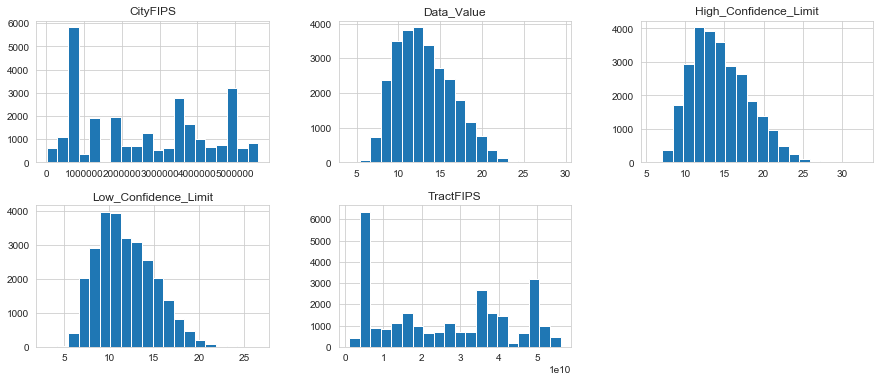

In [29]:
df.select_dtypes(include=np.number).hist(bins=20, figsize=(15,6), layout=(2,3))

> Add Commentary

Now, we will visualize how the percentage of survey takers with mental health is distributed across the country.